In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nengo
import time
palette = sns.color_palette("tab10")
sns.set_palette(palette)
sns.set(context='notebook', style='white')

In [2]:
def load_values(load=False, monkeys=['V', 'W'], sessions=[0,1,2,3], blocks=range(1,25), perturbs=np.linspace(-0.5, 0.5, 5)):
    if load:
        nef_values = pd.read_pickle("data/nef_values.pkl")
    else:
        emp = pd.read_pickle("data/empirical.pkl")
        nef_dfs = []
        rl_dfs = []
        for monkey in monkeys:
            for session in sessions:
                for block in blocks:
                # for block in emp.query("monkey==@monkey & session==@session")['block'].unique():
                    for trial in emp.query("monkey==@monkey & session==@session & block==@block")['trial'].unique():
                        for perturb in perturbs:
                            file = f"monkey{monkey}_session{session}_block{block}_trial{trial}_perturb{perturb}"
                            nef_dfs.append(pd.read_pickle(f'data/nef/{file}_values.pkl'))
        nef_values = pd.concat(nef_dfs, ignore_index=True)
        nef_values.to_pickle("data/nef_values.pkl")
    return nef_values

In [11]:
nef_values = load_values(False, monkeys=['V'], sessions=[1], blocks=[1,2,3], perturbs=np.linspace(-0.5, 0.5, 5))

In [12]:
nef_values

,monkey,session,block,trial,block_type,perturb,pre,post,va,vb,vl,vr,w,al,ar,clet,cloc,rew,acc
0,V,1,1,1,what,-0.50,1,-1,-0.005885,-0.001546,-0.001837,-0.009027,-0.000997,-0.077527,0.032801,A,right,-1,0
1,V,1,1,1,what,-0.25,1,-1,-0.005885,-0.001546,-0.001837,-0.009027,0.246044,-0.090068,0.076504,A,right,-1,0
2,V,1,1,1,what,0.00,1,-1,-0.005885,-0.001546,-0.001837,-0.009027,0.493184,-0.034731,0.077323,A,right,-1,0
3,V,1,1,1,what,0.25,1,-1,-0.005885,-0.001546,-0.001837,-0.009027,0.740621,0.012232,0.009551,B,left,1,1
4,V,1,1,1,what,0.50,1,-1,-0.005885,-0.001546,-0.001837,-0.009027,0.976758,0.040747,0.007568,B,left,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,V,1,3,80,what,-0.50,-1,37,-0.107025,0.142655,0.347576,0.010906,-0.333786,0.531753,-0.021759,B,left,-1,0
1196,V,1,3,80,what,-0.25,-1,37,-0.122312,0.137682,0.301722,0.010957,-0.073001,0.361157,0.060018,B,left,-1,0
1197,V,1,3,80,what,0.00,-1,37,-0.117518,0.146415,0.336723,0.008916,0.210365,0.271271,0.066141,B,left,-1,0
1198,V,1,3,80,what,0.25,-1,37,-0.082819,0.136356,0.341012,0.002672,0.477296,0.124533,0.113296,B,left,-1,0


## Confirm learning

/tmp/ipykernel_1265337/2353985370.py:2: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.lineplot(nef_values.query("block_type=='what'"), x='pre', y='acc', hue='perturb', palette=palette, ax=axes[0])
/tmp/ipykernel_1265337/2353985370.py:3: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.lineplot(nef_values.query("block_type=='what'"), x='post', y='acc', hue='perturb', palette=palette, ax=axes[1])
/tmp/ipykernel_1265337/2353985370.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(nef_values.query("block_type=='where'"), x='pre', y='acc', hue='perturb', palette=palette, ax=axes[2])
/tmp/ipykernel_1265337/2353985370.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(nef_values.query("block_type=='where'"), x='post', y='acc', hue='perturb', palette=palette, ax=axes[3])


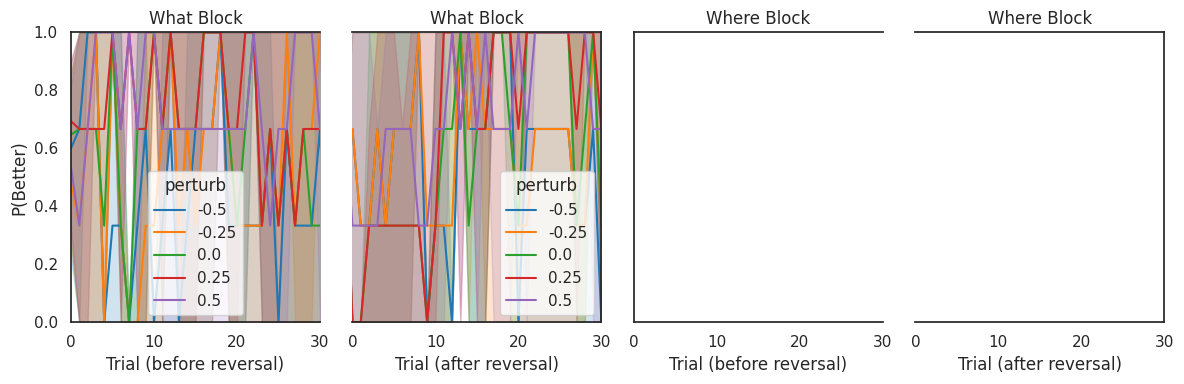

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=4, sharey=True, sharex=True, figsize=(12, 4))
sns.lineplot(nef_values.query("block_type=='what'"), x='pre', y='acc', hue='perturb', palette=palette, ax=axes[0])
sns.lineplot(nef_values.query("block_type=='what'"), x='post', y='acc', hue='perturb', palette=palette, ax=axes[1])
sns.lineplot(nef_values.query("block_type=='where'"), x='pre', y='acc', hue='perturb', palette=palette, ax=axes[2])
sns.lineplot(nef_values.query("block_type=='where'"), x='post', y='acc', hue='perturb', palette=palette, ax=axes[3])
axes[0].set(ylabel="P(Better)", xlabel='Trial (before reversal)', title='What Block', xlim=(0, 30), ylim=(0,1))
axes[1].set(xlabel='Trial (after reversal)', title='What Block')
axes[2].set(xlabel='Trial (before reversal)', title='Where Block')
axes[3].set(xlabel='Trial (after reversal)', title='Where Block')
axes[0].spines['right'].set_visible(False)
axes[1].spines['left'].set_visible(False)
axes[2].spines['right'].set_visible(False)
axes[3].spines['left'].set_visible(False)
fig.tight_layout()

/tmp/ipykernel_1265337/251304647.py:2: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.lineplot(nef_values.query("block_type=='what'"), x='pre', y='w', hue='perturb', palette=palette, ax=axes[0])
/tmp/ipykernel_1265337/251304647.py:3: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.lineplot(nef_values.query("block_type=='what'"), x='post', y='w', hue='perturb', palette=palette, ax=axes[1])
/tmp/ipykernel_1265337/251304647.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(nef_values.query("block_type=='where'"), x='pre', y='w', hue='perturb', palette=palette, ax=axes[2])
/tmp/ipykernel_1265337/251304647.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(nef_values.query("block_type=='where'"), x='post', y='w', hue='perturb', palette=palette, ax=axes[3])


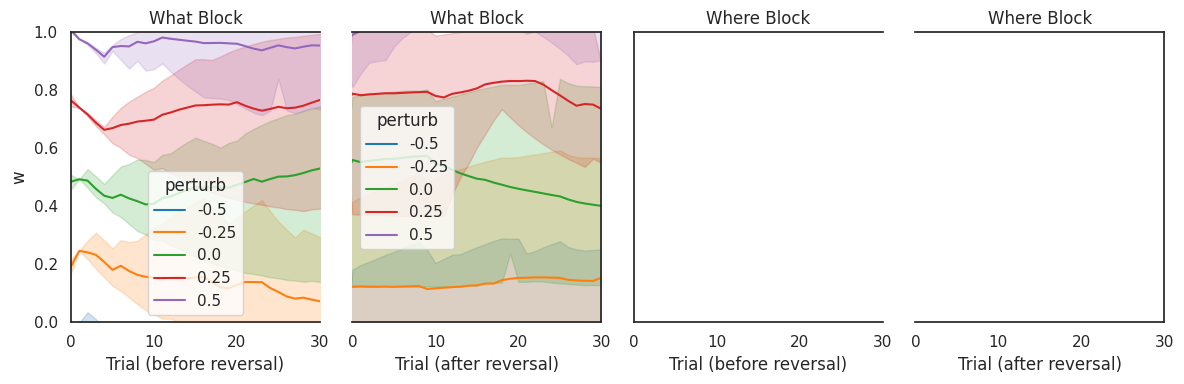

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=4, sharey=True, sharex=True, figsize=(12, 4))
sns.lineplot(nef_values.query("block_type=='what'"), x='pre', y='w', hue='perturb', palette=palette, ax=axes[0])
sns.lineplot(nef_values.query("block_type=='what'"), x='post', y='w', hue='perturb', palette=palette, ax=axes[1])
sns.lineplot(nef_values.query("block_type=='where'"), x='pre', y='w', hue='perturb', palette=palette, ax=axes[2])
sns.lineplot(nef_values.query("block_type=='where'"), x='post', y='w', hue='perturb', palette=palette, ax=axes[3])
axes[0].set(xlabel='Trial (before reversal)', title='What Block', xlim=(0, 30), ylim=(0,1))
axes[1].set(xlabel='Trial (after reversal)', title='What Block')
axes[2].set(xlabel='Trial (before reversal)', title='Where Block')
axes[3].set(xlabel='Trial (after reversal)', title='Where Block')
axes[0].spines['right'].set_visible(False)
axes[1].spines['left'].set_visible(False)
axes[2].spines['right'].set_visible(False)
axes[3].spines['left'].set_visible(False)
fig.tight_layout()

## Compute Differential Response

In [23]:
def add_DR(data):
    dfs = []
    columns = ['monkey', 'session', 'block', 'block_type', 'DR_let', 'DR_loc']
    for monkey in data['monkey'].unique():
        for session in data.query("monkey==@monkey")['session'].unique():
            for block in data.query("monkey==@monkey & session==@session")['block'].unique():
                subdata = data.query("monkey==@monkey & session==@session & block==@block")
                block_type = subdata['block_type'].values[0]
                n_stay_let_win = 0
                n_stay_let_lose = 0
                n_stay_loc_win = 0
                n_stay_loc_lose = 0
                for trial in subdata['trial'].unique()[1:]:
                    reward = subdata.query("trial==@trial")['rew'].values[0]
                    past_trial = trial - 1
                    past_let = subdata.query("trial==@past_trial")['clet'].values[0]
                    current_let = subdata.query("trial==@trial")['clet'].values[0]
                    past_loc = subdata.query("trial==@past_trial")['cloc'].values[0]
                    current_loc = subdata.query("trial==@trial")['cloc'].values[0]
                    if current_let==past_let:
                        if reward==1:
                            n_stay_let_win += 1
                        else:
                            n_stay_let_lose += 1
                    if current_loc==past_loc:
                        if reward==1:
                            n_stay_loc_win += 1
                        else:
                            n_stay_loc_lose += 1
                if n_stay_let_win + n_stay_let_lose > 0:
                    p_stay_let_win = n_stay_let_win / (n_stay_let_win + n_stay_let_lose)
                    p_stay_let_lose = n_stay_let_lose / (n_stay_let_win + n_stay_let_lose)
                    DR_let = p_stay_let_win - p_stay_let_lose
                else:
                    DR_let = None
                if n_stay_loc_win + n_stay_loc_lose > 0:
                    p_stay_loc_win = n_stay_loc_win / (n_stay_loc_win + n_stay_loc_lose)
                    p_stay_loc_lose = n_stay_loc_lose / (n_stay_loc_win + n_stay_loc_lose)
                    DR_loc = p_stay_loc_win - p_stay_loc_lose
                else:
                    DR_loc = None
                dfs.append(pd.DataFrame([[monkey, session, block, block_type, DR_let, DR_loc]], columns=columns))
    dr_data = pd.concat(dfs, ignore_index=True)
    return dr_data

In [24]:
nef_dr = add_DR(nef_values)

In [25]:
nef_dr

,monkey,session,block,block_type,DR_let,DR_loc
0,V,1,1,what,0.287671,0.150000
1,V,1,2,what,0.194444,0.024390
2,V,1,3,what,0.169231,0.087719
3,V,1,4,what,0.378378,0.380952
4,V,1,22,where,0.272727,0.362319
5,V,1,23,where,-0.061224,0.106383
6,V,1,24,where,0.392857,0.368421


<Axes: xlabel='DR_let', ylabel='DR_loc'>

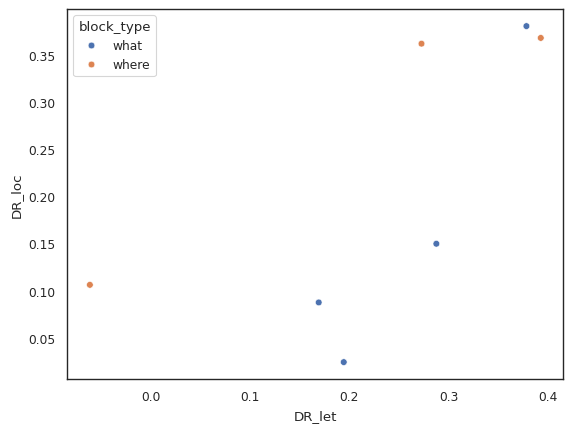

In [28]:
fig, ax = plt.subplots()
sns.scatterplot(data=nef_dr, x='DR_let', y='DR_loc', hue='block_type')